## Data

> This project is using Ames Housing Dataset which compiled by Dean De Cock that i get from Kaggle.com. there is 2 data: Train Data and Test Data
    https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
    
## Objective

> 1. For practice and enhance my ability in data analysis
2. Finding the best Regression Model based on Root-Mean-Squared-Error (RMSE)
3. Predicting house prices for each house

## Features

> Data features saved in data_description.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(palette='pastel')

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
all_data=pd.concat((train_data,test_data), sort=False).reset_index(drop=True)

In [3]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
train_data.head().sort_values(by='Id')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

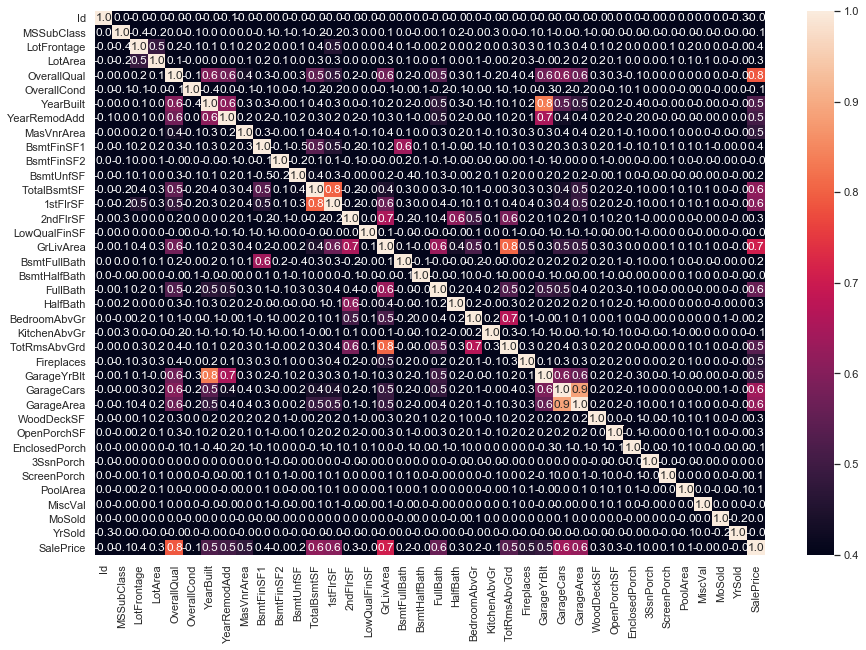

In [6]:
corr_mat=all_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, vmin=0.4, fmt=".1f", annot=True)

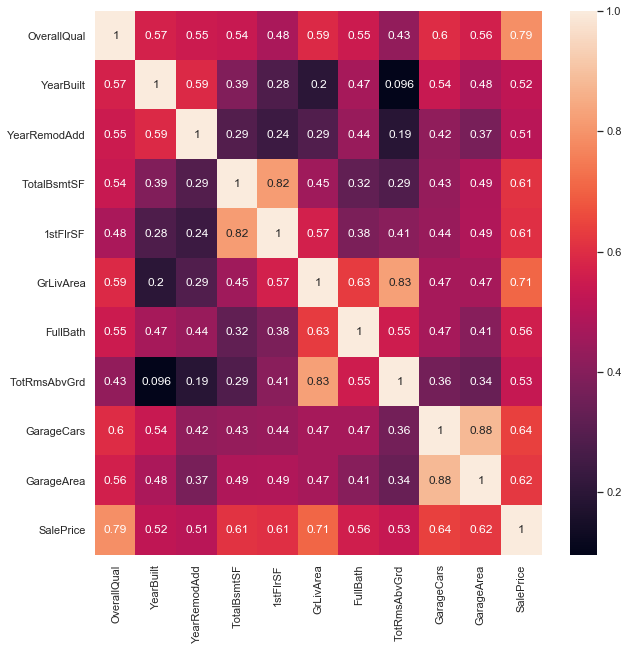

In [7]:
# Top Correlation
top_corr=corr_mat.index[abs(corr_mat['SalePrice'])>0.5]
plt.figure(figsize=(10,10))
top=sns.heatmap(train_data[top_corr].corr(), annot=True)

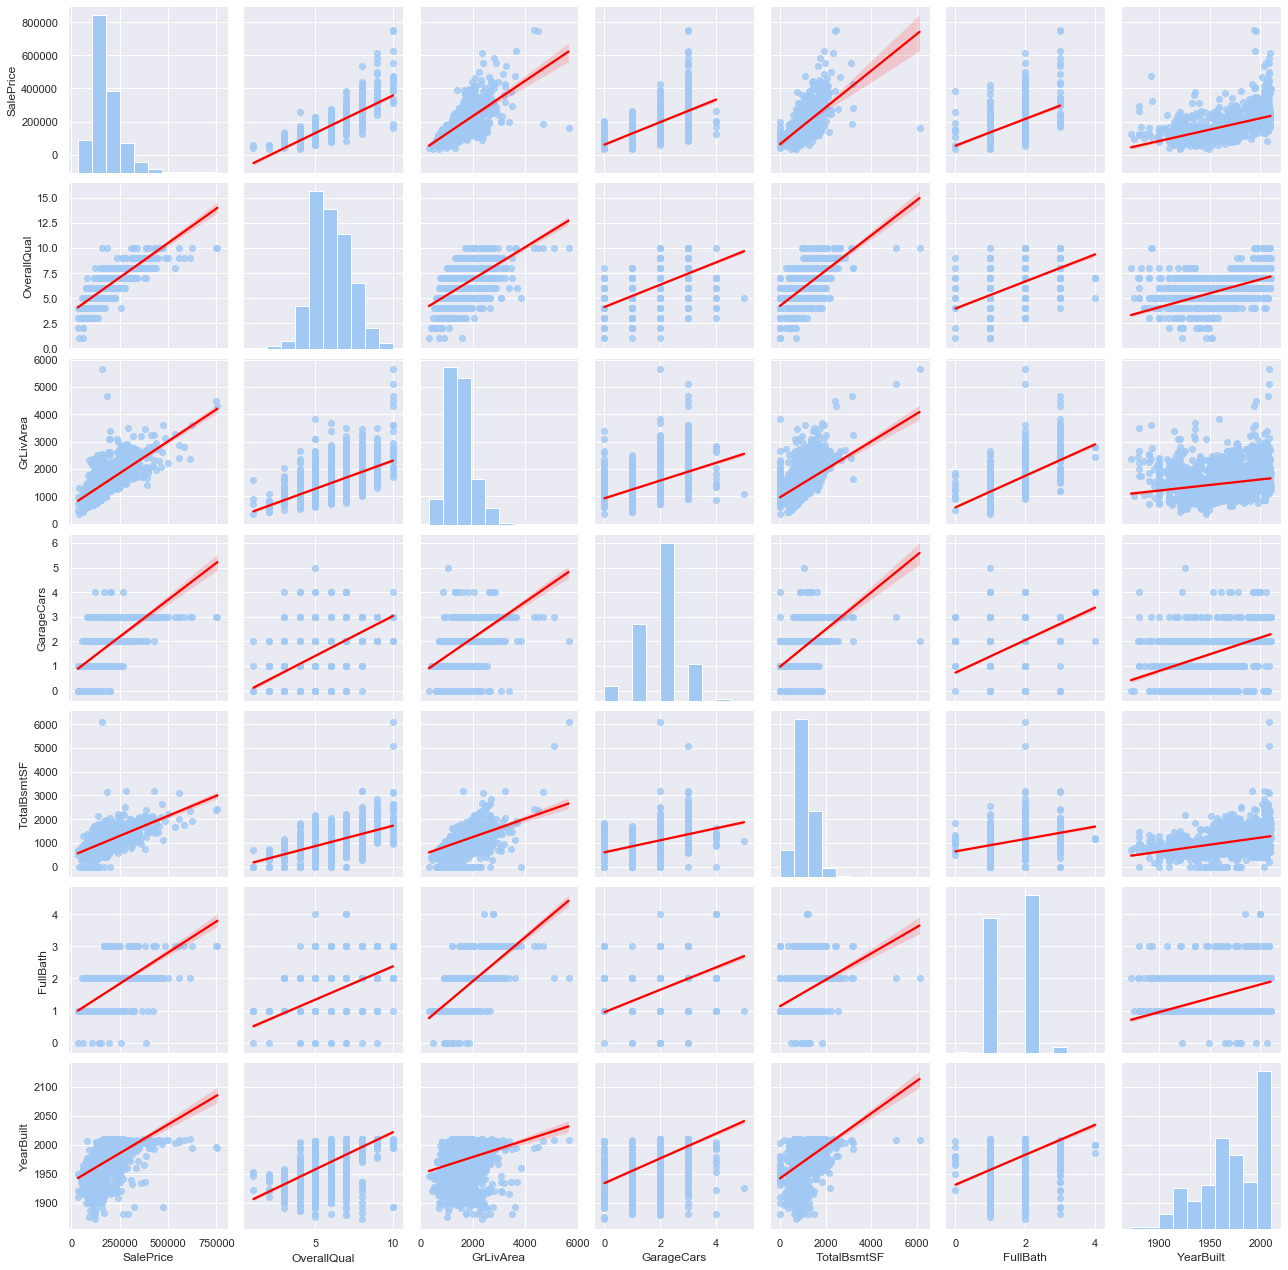

In [8]:
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(all_data[cols], kind='reg', plot_kws={'line_kws':{'color': 'red'}})
plt.show()

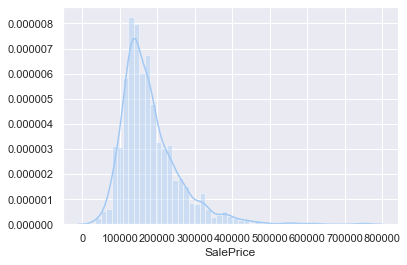

In [9]:
# plt.figure(figsize=(10,6))
sns.distplot(all_data['SalePrice'])
plt.show()

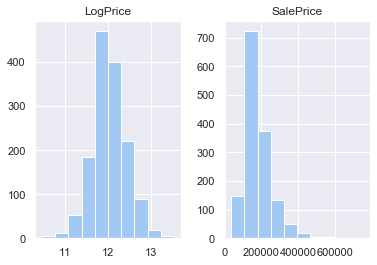

In [10]:
price=pd.DataFrame({'SalePrice':all_data['SalePrice'], 'LogPrice':np.log1p(all_data['SalePrice'])})
price.hist()
plt.show()

In [11]:
all_data['SalePrice']=np.log1p(all_data['SalePrice'])

## Make all_data0 dataframe for feature checking

In [12]:
all_data0=all_data.drop(['SalePrice'], axis=1)
all_data0.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Missing Value

In [13]:
all_data0.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
Exterior1st         1
Exterior2nd         1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
Electrical          1
KitchenQual         1
GarageArea          1
GarageCars          1
HouseStyle          0
LandSlope           0
MSSubClass          0
LotArea             0
Street              0
LotShape            0
LandContour         0
LotConfig           0
Neighborhood        0
OverallQual         0
Condition1          0
Condition2

In [14]:
obj_features=all_data0.columns[all_data0.dtypes==object]
all_data0[obj_features].isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
Electrical          1
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
Heating             0
Condition1          0
Street              0
PavedDrive          0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
RoofStyle           0
Condition2          0
BldgType            0
HouseStyle          0
HeatingQC           0
RoofMatl            0
ExterQual           0
ExterCond           0
Foundation          0
CentralAir          0
SaleCondition       0
dtype: int64

In [15]:
all_data0[obj_features]=all_data0[obj_features].fillna('None')
all_data0[obj_features].isnull().sum().sort_values(ascending=False)

SaleCondition    0
Condition2       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
Foundation       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
ExterCond        0
BsmtQual         0
SaleType         0
FireplaceQu      0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
BsmtCond         0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSZoning         0
dtype: int64

In [16]:
num_features=all_data0.columns[all_data0.dtypes!=object]
all_data0[num_features].isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
LowQualFinSF       0
LotArea            0
MSSubClass         0
1stFlrSF           0
2ndFlrSF           0
YrSold             0
GrLivArea          0
MoSold             0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
Id                 0
dtype: int64

In [17]:
all_data0[num_features]=all_data0[num_features].fillna({'LotFrontage': all_data0['LotFrontage'].mean(), 
                                 'GarageYrBlt': all_data0['GarageYrBlt'].mean(), 
                                 'MasVnrArea': all_data0['MasVnrArea'].mean(),
                                 'BsmtHalfBath': all_data0['BsmtHalfBath'].mean(),
                                 'BsmtFullBath': all_data0['BsmtFullBath'].mean(),
                                 'GarageCars': all_data0['GarageCars'].mean(),
                                 'BsmtFinSF1': all_data0['BsmtFinSF1'].mean(),
                                 'TotalBsmtSF': all_data0['TotalBsmtSF'].mean(),
                                 'BsmtUnfSF': all_data0['BsmtUnfSF'].mean(),
                                 'GarageArea': all_data0['GarageArea'].mean(),
                                 'BsmtFinSF2': all_data0['BsmtFinSF2'].mean()})
all_data0[num_features].isnull().sum().sort_values(ascending=False)

YrSold           0
BsmtFullBath     0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
MSSubClass       0
GrLivArea        0
BsmtHalfBath     0
MoSold           0
FullBath         0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
Id               0
dtype: int64

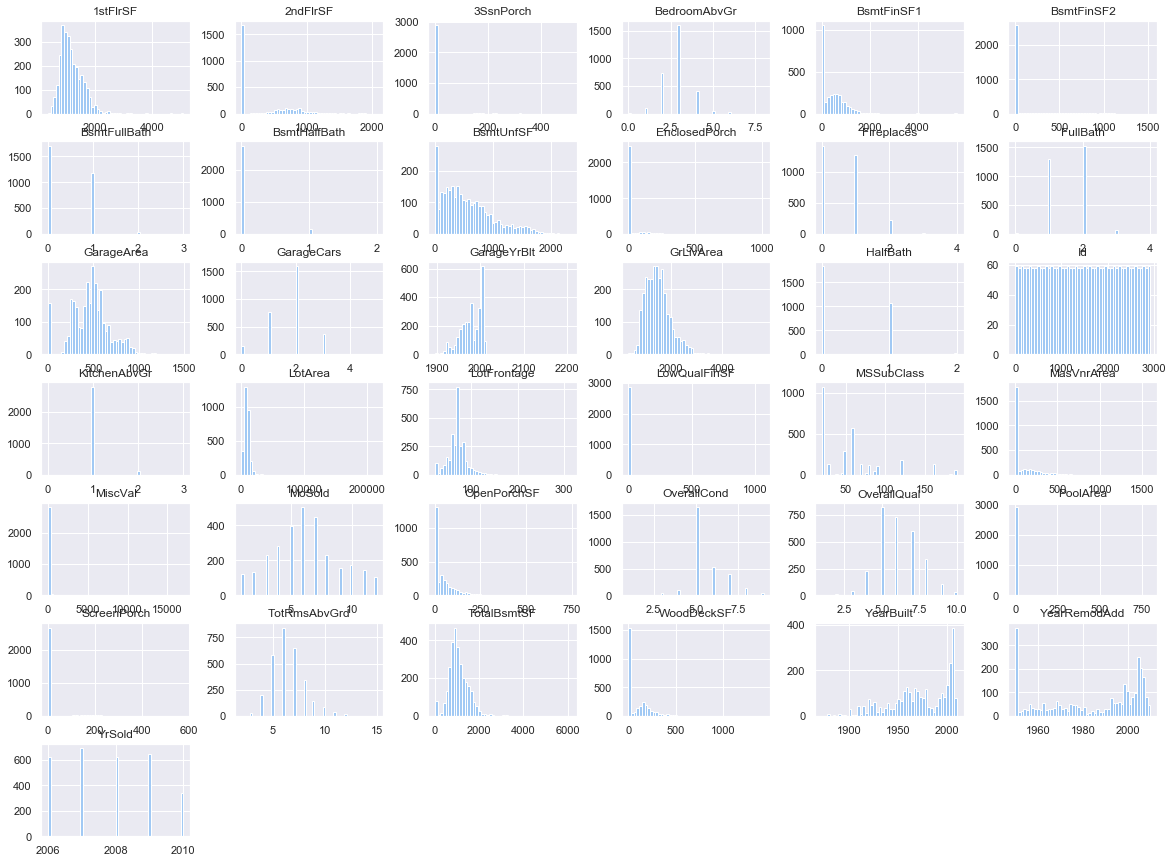

In [18]:
all_data0[num_features].hist(figsize=(20,15), bins=50)
plt.show()

In [19]:
skew_feature=all_data0[num_features].skew()
skew_feature=skew_feature[skew_feature>0.5]
print(skew_feature.index)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')


In [20]:
high_skew=all_data0[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']]
log_skew=np.log1p(high_skew)
log_skew.describe()

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,3.820503,4.205612,9.094915,1.867152,2.115773,4.227042,0.682318,5.627387,6.733218,7.004186,2.829584,0.077100,7.261502,0.293800,0.042152,0.261117,0.710829,1.986955,0.389300,2.449664,2.333006,0.757435,0.066197,0.451214,0.027361,0.234767
std,0.692436,0.321011,0.509882,0.173171,2.623993,2.981014,1.879447,1.866498,1.175882,0.322650,3.277023,0.659472,0.324750,0.351775,0.167436,0.341563,0.088196,0.206864,0.394826,2.592335,2.154239,1.771894,0.587089,1.459808,0.410265,1.240206
min,3.044522,3.091042,7.170888,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.919854,1.791759,0.000000,0.000000,0.000000,5.398163,6.677083,6.776507,0.000000,0.000000,7.027315,0.000000,0.000000,0.000000,0.693147,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.931826,4.252854,9.154193,1.791759,0.000000,5.913503,0.000000,6.148468,6.898715,6.987490,0.000000,0.000000,7.275865,0.000000,0.000000,0.000000,0.693147,1.945910,0.693147,0.000000,3.295837,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.262680,4.369448,9.356257,1.945910,5.102906,6.598509,0.000000,6.692083,7.172425,7.235979,6.558198,0.000000,7.464223,0.693147,0.000000,0.693147,0.693147,2.079442,0.693147,5.129899,4.262680,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.252273,5.749393,12.279537,2.302585,7.378384,8.638525,7.331060,7.756623,8.717846,8.536211,7.633370,6.970730,8.638171,1.386294,1.098612,1.098612,1.386294,2.772589,1.609438,7.261927,6.610696,6.920672,6.232448,6.357842,6.685861,9.741027


In [21]:
all_data0.update(log_skew)

## Encoding Features
https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in all_data0[obj_features].columns:
    all_data0[col]=le.fit_transform(all_data0[col])

all_data0.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,4.110874,4,4.189655,9.042040,1,1,3,3,0,4,0,5,2,2,0,5,7,1.791759,2003,2003,1,1,13,14,1,5.283204,2,4,2,2,4,3,2,6.561031,6,0.0,5.017280,6.753438,1,0,1,5,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2,2.197225,7,0.000000,3,1,2003.0,2,2.0,548.0,5,5,2,0.000000,4.127134,0.000000,0.0,0.0,0.0,3,4,1,0.0,2,2008,9,4
1,2,3.044522,4,4.394449,9.169623,1,1,3,3,0,2,0,24,1,2,0,2,6,2.197225,1976,1976,1,1,8,8,2,0.000000,3,4,1,2,4,1,0,6.886532,6,0.0,5.652489,7.141245,1,0,1,5,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,4,1.945910,7,0.693147,5,1,1976.0,2,2.0,460.0,5,5,2,5.700444,0.000000,0.000000,0.0,0.0,0.0,3,4,1,0.0,5,2007,9,4
2,3,4.110874,4,4.234107,9.328212,1,1,0,3,0,4,0,5,2,2,0,5,7,1.791759,2001,2002,1,1,13,14,1,5.093750,2,4,2,2,4,2,2,6.188264,6,0.0,6.075346,6.825460,1,0,1,5,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,2,1.945910,7,0.693147,5,1,2001.0,2,2.0,608.0,5,5,2,0.000000,3.761200,0.000000,0.0,0.0,0.0,3,4,1,0.0,9,2008,9,4
3,4,4.262680,4,4.110874,9.164401,1,1,0,3,0,0,0,6,2,2,0,5,7,1.791759,1915,1970,1,1,14,16,2,0.000000,3,4,0,4,1,3,0,5.379897,6,0.0,6.293419,6.629363,1,2,1,5,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2,2.079442,7,0.693147,2,5,1998.0,3,3.0,642.0,5,5,2,0.000000,3.583519,5.609472,0.0,0.0,0.0,3,4,1,0.0,2,2006,9,0
4,5,4.110874,4,4.442651,9.565284,1,1,0,3,0,2,0,15,2,2,0,5,8,1.791759,2000,2000,1,1,13,14,1,5.860786,2,4,2,2,4,0,2,6.486161,6,0.0,6.196444,7.044033,1,0,1,5,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2,2.302585,7,0.693147,5,1,2000.0,2,3.0,836.0,5,5,2,5.262690,4.442651,0.000000,0.0,0.0,0.0,3,4,1,0.0,12,2008,9,4


## Update all_data0 to all_data dataframe

In [55]:
all_data.update(all_data0)
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,4,4.189655,9.042040,1,1,3,3,0,4,0,5,2,2,0,5,7,1.791759,2003,2003,1,1,13,14,1,5.283204,2,4,2,2,4,3,2,6.561031,6,0.0,5.017280,6.753438,1,0,1,5,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2,2.197225,7,0.000000,3,1,2003.0,2,2.0,548.0,5,5,2,0.000000,4.127134,0.000000,0.0,0.0,0.0,3,4,1,0.0,2,2008,9,4,12.247699
1,2,3.044522,4,4.394449,9.169623,1,1,3,3,0,2,0,24,1,2,0,2,6,2.197225,1976,1976,1,1,8,8,2,0.000000,3,4,1,2,4,1,0,6.886532,6,0.0,5.652489,7.141245,1,0,1,5,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,4,1.945910,7,0.693147,5,1,1976.0,2,2.0,460.0,5,5,2,5.700444,0.000000,0.000000,0.0,0.0,0.0,3,4,1,0.0,5,2007,9,4,12.109016
2,3,4.110874,4,4.234107,9.328212,1,1,0,3,0,4,0,5,2,2,0,5,7,1.791759,2001,2002,1,1,13,14,1,5.093750,2,4,2,2,4,2,2,6.188264,6,0.0,6.075346,6.825460,1,0,1,5,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,2,1.945910,7,0.693147,5,1,2001.0,2,2.0,608.0,5,5,2,0.000000,3.761200,0.000000,0.0,0.0,0.0,3,4,1,0.0,9,2008,9,4,12.317171
3,4,4.262680,4,4.110874,9.164401,1,1,0,3,0,0,0,6,2,2,0,5,7,1.791759,1915,1970,1,1,14,16,2,0.000000,3,4,0,4,1,3,0,5.379897,6,0.0,6.293419,6.629363,1,2,1,5,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2,2.079442,7,0.693147,2,5,1998.0,3,3.0,642.0,5,5,2,0.000000,3.583519,5.609472,0.0,0.0,0.0,3,4,1,0.0,2,2006,9,0,11.849405
4,5,4.110874,4,4.442651,9.565284,1,1,0,3,0,2,0,15,2,2,0,5,8,1.791759,2000,2000,1,1,13,14,1,5.860786,2,4,2,2,4,0,2,6.486161,6,0.0,6.196444,7.044033,1,0,1,5,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2,2.302585,7,0.693147,5,1,2000.0,2,3.0,836.0,5,5,2,5.262690,4.442651,0.000000,0.0,0.0,0.0,3,4,1,0.0,12,2008,9,4,12.429220


In [56]:
cleaned_train=all_data.loc[all_data['Id']<=1460]
cleaned_test=all_data.loc[all_data['Id']>1460]
cleaned_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,4,4.189655,9.042040,1,1,3,3,0,4,0,5,2,2,0,5,7,1.791759,2003,2003,1,1,13,14,1,5.283204,2,4,2,2,4,3,2,6.561031,6,0.0,5.017280,6.753438,1,0,1,5,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2,2.197225,7,0.000000,3,1,2003.0,2,2.0,548.0,5,5,2,0.000000,4.127134,0.000000,0.0,0.0,0.0,3,4,1,0.0,2,2008,9,4,12.247699
1,2,3.044522,4,4.394449,9.169623,1,1,3,3,0,2,0,24,1,2,0,2,6,2.197225,1976,1976,1,1,8,8,2,0.000000,3,4,1,2,4,1,0,6.886532,6,0.0,5.652489,7.141245,1,0,1,5,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,4,1.945910,7,0.693147,5,1,1976.0,2,2.0,460.0,5,5,2,5.700444,0.000000,0.000000,0.0,0.0,0.0,3,4,1,0.0,5,2007,9,4,12.109016
2,3,4.110874,4,4.234107,9.328212,1,1,0,3,0,4,0,5,2,2,0,5,7,1.791759,2001,2002,1,1,13,14,1,5.093750,2,4,2,2,4,2,2,6.188264,6,0.0,6.075346,6.825460,1,0,1,5,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,2,1.945910,7,0.693147,5,1,2001.0,2,2.0,608.0,5,5,2,0.000000,3.761200,0.000000,0.0,0.0,0.0,3,4,1,0.0,9,2008,9,4,12.317171
3,4,4.262680,4,4.110874,9.164401,1,1,0,3,0,0,0,6,2,2,0,5,7,1.791759,1915,1970,1,1,14,16,2,0.000000,3,4,0,4,1,3,0,5.379897,6,0.0,6.293419,6.629363,1,2,1,5,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2,2.079442,7,0.693147,2,5,1998.0,3,3.0,642.0,5,5,2,0.000000,3.583519,5.609472,0.0,0.0,0.0,3,4,1,0.0,2,2006,9,0,11.849405
4,5,4.110874,4,4.442651,9.565284,1,1,0,3,0,2,0,15,2,2,0,5,8,1.791759,2000,2000,1,1,13,14,1,5.860786,2,4,2,2,4,0,2,6.486161,6,0.0,6.196444,7.044033,1,0,1,5,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2,2.302585,7,0.693147,5,1,2000.0,2,3.0,836.0,5,5,2,5.262690,4.442651,0.000000,0.0,0.0,0.0,3,4,1,0.0,12,2008,9,4,12.429220


In [57]:
train=cleaned_train.copy()
test=cleaned_test.copy()
train.drop(['Id'], axis=1, inplace=True)
test.drop(['SalePrice', 'Id'],axis=1, inplace=True)

In [58]:
print(train.shape, test.shape)

(1460, 80) (1459, 79)


## Modelling

In [59]:
X_train = train.drop(['SalePrice'], axis=1)
y_train = train['SalePrice']
print(X_train.shape, y_train.shape)

(1460, 79) (1460,)


In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [67]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from math import sqrt

def rmsecv(reg):
    k=KFold(5, shuffle=True, random_state=42)
    rmse=np.sqrt(-cross_val_score(reg, X_train.values, y_train.values, scoring='neg_mean_squared_error', cv=k))
    mean_rmse=format(rmse.mean(), '.4f'), format(rmse.std(), '.4f')
    return mean_rmse

def r2(reg):
    k=KFold(5, shuffle=True, random_state=42)
    r2=np.sqrt(cross_val_score(reg, X_train.values, y_train.values, scoring='r2', cv=k))
    mean_r2=format(r2.mean(), '.2f'), format(r2.std(), '.2f')
    return mean_r2

## Linear Regression

In [68]:
lr=LinearRegression()
lr=lr.fit(X_train, y_train)
print('RMSE: ',rmsecv(lr), '\nR2: ',r2(lr))

RMSE:  ('0.1439', '0.0226') 
R2:  ('0.93', '0.03')


In [31]:
lr_param={'fit_intercept': [True, False],
          'normalize': [True, False],
          'copy_X': [True, False],
         }

lr_grid=GridSearchCV(estimator=LinearRegression(),
                    param_grid=lr_param,
                    n_jobs=-1)

lr_tune=lr_grid.fit(X_train, y_train)
print(lr_tune.best_params_)
print('RMSE: ',rmsecv(lr_tune), '\nR2: ',r2(lr_tune))

{'copy_X': True, 'fit_intercept': True, 'normalize': False}
RMSE:  ('181252872763.1701', '362505745526.0732') 
R2:  ('nan', 'nan')


## Lasso

In [32]:
las=Lasso()
las=las.fit(X_train, y_train)
print('RMSE: ',rmsecv(las), '\nR2: ',r2(las))

RMSE:  ('0.2671', '0.0181') 
R2:  ('0.74', '0.01')


In [33]:
las_param={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'max_iter': list(range(100,1500, 100)),
          'tol': [0.0001, 0.001, 0.01, 0.1, 1],
          'selection': ['cyclic', 'random']}

las_grid=GridSearchCV(estimator=Lasso(),
                     param_grid=las_param,
                     n_jobs=-1)

las_tune=las_grid.fit(X_train, y_train)
print(las_tune.best_params_)
print('RMSE: ',rmsecv(las_tune), '\nR2: ',r2(las_tune))

{'alpha': 0.001, 'max_iter': 100, 'selection': 'random', 'tol': 0.0001}
RMSE:  ('0.1398', '0.0212') 
R2:  ('0.93', '0.03')


## ElasticNet

In [34]:
en=ElasticNet()
en=en.fit(X_train, y_train)
print('RMSE: ',rmsecv(en), '\nR2: ',r2(en))

RMSE:  ('0.2636', '0.0165') 
R2:  ('0.75', '0.01')


In [35]:
en_param={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'max_iter': list(range(100,1500, 100)),
          'tol': [0.0001, 0.001, 0.01, 0.1, 1],
          'selection': ['cyclic', 'random']}

en_grid=GridSearchCV(estimator=ElasticNet(),
                    param_grid=en_param,
                    n_jobs=-1)

en_tune=en_grid.fit(X_train, y_train)
print(en_tune.best_params_)
print('RMSE: ',rmsecv(en_tune), '\nR2: ',r2(en_tune))

{'alpha': 0.001, 'max_iter': 500, 'selection': 'random', 'tol': 0.01}
RMSE:  ('0.1414', '0.0212') 
R2:  ('0.93', '0.03')


## Ridge 

In [36]:
ridge=Ridge()
ridge=ridge.fit(X_train, y_train)
print('RMSE: ',rmsecv(ridge), '\nR2: ',r2(ridge))

RMSE:  ('0.1424', '0.0227') 
R2:  ('0.93', '0.03')


In [37]:
ridge_param={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'max_iter': list(range(100,1500, 100)),
          'tol': [0.0001, 0.001, 0.01, 0.1, 1]}

ridge_grid=GridSearchCV(estimator=Ridge(),
                       param_grid=ridge_param,
                       n_jobs=-1)

ridge_tune=ridge_grid.fit(X_train, y_train)
print(ridge_tune.best_params_)
print('RMSE: ',rmsecv(ridge_tune), '\nR2: ',r2(ridge_tune))

{'alpha': 1, 'max_iter': 100, 'tol': 0.0001}
RMSE:  ('0.1439', '0.0218') 
R2:  ('0.93', '0.03')


## Gradient Boosting Regressor

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [38]:
gbr=GradientBoostingRegressor()
gbr=gbr.fit(X_train,y_train)
print('RMSE: ',rmsecv(gbr), '\nR2: ',r2(gbr))

RMSE:  ('0.1363', '0.0212') 
R2:  ('0.94', '0.02')


In [39]:
gbr_param={'n_estimators': list(range(100,1000, 100)),
          'min_samples_split': [2,3,4],
          'min_samples_leaf': [1,2],
            'max_depth': [3,4,5],
          'max_features': ['auto', 'sqrt', 'log2']}

gbr_grid=GridSearchCV(estimator=GradientBoostingRegressor(),
                     param_grid=gbr_param,
                     n_jobs=-1)

gbr_tune=gbr_grid.fit(X_train, y_train)
print(gbr_tune.best_params_)
print('RMSE: ',rmsecv(gbr_tune), '\nR2: ',r2(gbr_tune))

{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
RMSE:  ('0.1301', '0.0185') 
R2:  ('0.95', '0.02')


## XGBRegressor

In [70]:
xgb=XGBRegressor(objective='reg:linear')
xgb=xgb.fit(X_train.values, y_train.values)
print('RMSE: ',rmsecv(xgb), '\nR2: ',r2(xgb))

[18:36:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [72]:
xgb_param={'max_depth': [5,6,7,8],
          'subsample': [0.5,1],
          'sampling_method': ['uniform', 'gradient_based'],
          'n_estimators': list(range(100, 1200, 100)),
          'objective': ['reg:linear']}

xgb_grid=GridSearchCV(estimator=XGBRegressor(),
                     param_grid=xgb_param,
                     n_jobs=-1)

xgb_tune=xgb_grid.fit(X_train.values, y_train.values)
print(xgb_tune.best_params_)
print('RMSE: ',rmsecv(xgb_tune), '\nR2: ',r2(xgb_tune))

[18:42:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'max_depth': 5, 'n_estimators': 200, 'objective': 'reg:linear', 'sampling_method': 'uniform', 'subsample': 0.5}
[18:46:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:54:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:03:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now 

## LGBMRegressor

In [73]:
lgbm=LGBMRegressor(objective='regression')
lgbm=lgbm.fit(X_train.values, y_train.values)
print('RMSE: ',rmsecv(lgbm), '\nR2: ',r2(lgbm))

RMSE:  ('0.1345', '0.0184') 
R2:  ('0.94', '0.02')


In [74]:
lgbm_param={'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': list(range(100, 1200, 100)),
    'boosting_type' : ['gbdt', 'dart'],
    'objective': ['regression']}

lgbm_grid=GridSearchCV(estimator=LGBMRegressor(),
                       param_grid=lgbm_param,
                       n_jobs=-1)

lgbm_tune=lgbm_grid.fit(X_train.values, y_train.values)
print(lgbm_tune.best_params_)
print('RMSE: ',rmsecv(lgbm_tune), '\nR2: ',r2(lgbm_tune))

{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 1100, 'objective': 'regression'}
RMSE:  ('0.1339', '0.0187') 
R2:  ('0.94', '0.02')


## Stacking Regressor

In [75]:
from mlxtend.regressor import StackingCVRegressor

In [81]:
lr_param={'copy_X': True, 'fit_intercept': True, 'normalize': False }
las_param={'alpha': 0.001, 'max_iter': 100, 'selection': 'random', 'tol': 0.0001}
en_param={'alpha': 0.001, 'max_iter': 500, 'selection': 'random', 'tol': 0.01}
ridge_param={'alpha': 1, 'max_iter': 100, 'tol': 0.0001}
gbr_param={'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
xgb_param={'max_depth': 5, 'n_estimators': 200, 'objective': 'reg:linear', 'sampling_method': 'uniform', 'subsample': 0.5}
lgbm_param={'boosting_type': 'gbdt', 'learning_rate': 0.01, 'n_estimators': 1100, 'objective': 'regression'}

In [82]:
lr=LinearRegression(**lr_param)
las=Lasso(**las_param)
en=ElasticNet(**en_param)
ridge=Ridge(**ridge_param)
gbr=GradientBoostingRegressor(**gbr_param)
xgb=XGBRegressor(**xgb_param)
lgbm=LGBMRegressor(**lgbm_param)

In [83]:
stack1=StackingCVRegressor(regressors=(lr,las,en,ridge,gbr,xgb,lgbm),
                          meta_regressor=lr,
                          random_state=42,
                          cv=5,
                          n_jobs=-1)
stack1=stack1.fit(X_train.values, y_train.values)

stack2=StackingCVRegressor(regressors=(lr,las,en,ridge,gbr,xgb,lgbm),
                          meta_regressor=las,
                          random_state=42,
                          cv=5,
                          n_jobs=-1)
stack2=stack2.fit(X_train.values, y_train.values)

stack3=StackingCVRegressor(regressors=(lr,las,en,ridge,gbr,xgb,lgbm),
                          meta_regressor=en,
                          random_state=42,
                          cv=5,
                          n_jobs=-1)
stack3=stack3.fit(X_train.values, y_train.values)

stack4=StackingCVRegressor(regressors=(lr,las,en,ridge,gbr,xgb,lgbm),
                          meta_regressor=ridge,
                          random_state=42,
                          cv=5,
                          n_jobs=-1)
stack4=stack4.fit(X_train.values, y_train.values)

stack5=StackingCVRegressor(regressors=(lr,las,en,ridge,gbr,xgb,lgbm),
                          meta_regressor=gbr,
                          random_state=42,
                          cv=5,
                          n_jobs=-1)
stack5=stack5.fit(X_train.values, y_train.values)

stack6=StackingCVRegressor(regressors=(lr,las,en,ridge,gbr,xgb,lgbm),
                          meta_regressor=xgb,
                          random_state=42,
                          cv=5,
                          n_jobs=-1)
stack6=stack6.fit(X_train.values, y_train.values)

stack7=StackingCVRegressor(regressors=(lr,las,en,ridge,gbr,xgb,lgbm),
                          meta_regressor=lgbm,
                          random_state=42,
                          cv=5,
                          n_jobs=-1)
stack7=stack7.fit(X_train.values, y_train.values)


[21:54:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:54:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:54:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:54:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:55:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:55:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:55:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:55:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [85]:
for reg, label in zip([lr,las,en,ridge,gbr,xgb,lgbm,stack1,stack2,stack3,stack4,stack5,stack6,stack7],
                      ['lr','las','en','ridge','gbr','xgb','lgbm','stack1','stack2','stack3','stack4','stack5','stack6','stack7']):
    stack_rmse=np.sqrt(-cross_val_score(reg, X_train.values, y_train.values, scoring='neg_mean_squared_error', cv=5))
    print("MSE Score: %0.5f (+/- %0.5f) [%s]" % (
        stack_rmse.mean(), stack_rmse.std(), label))

MSE Score: 0.13617 (+/- 0.01652) [lr]
MSE Score: 0.13558 (+/- 0.01610) [las]
MSE Score: 0.13517 (+/- 0.01617) [en]
MSE Score: 0.13551 (+/- 0.01654) [ridge]
MSE Score: 0.12279 (+/- 0.01048) [gbr]
[00:48:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:48:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:48:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:48:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:48:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE Score: 0.12619 (+/- 0.01209) [xgb]
MSE Score: 0.13218 (+/- 0.01009) [lgbm]
[00:49:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:22] WARNING: src/object

In [87]:
stack_pred = np.expm1(stack4.predict(test.values))
stack_pred

array([124911.66180487, 156698.48610209, 182884.47918592, ...,
       157952.87669624, 118208.79737318, 224895.19412375])

In [89]:
submission=pd.DataFrame()
submission['Id']=cleaned_test['Id']
submission['SalePrice']=stack_pred
submission

,Id,SalePrice
1460,1461,124911.661805
1461,1462,156698.486102
1462,1463,182884.479186
1463,1464,193033.988603
1464,1465,184253.983719
1465,1466,172587.719008
1466,1467,176237.124543
1467,1468,164915.813135
1468,1469,181496.472399
1469,1470,121368.072270


In [90]:
submission.to_csv('submission.csv', index=False)